In [2]:
optim = require 'optim'

In [3]:
trainset = torch.load('full_back_agu.dat')

In [4]:
trainset

{
  data : ByteTensor - size: 1904x3x20x20
  label : ByteTensor - size: 1904
}


In [7]:
itorch.image(trainset.data[19])

In [8]:
setmetatable(trainset, 
    {__index = function(t, i) 
                    return {t.data[i], t.label[i]} 
                end}
);
trainset.data = trainset.data:float() -- convert the data from a ByteTensor to a DoubleTensor.

function trainset:size() 
    return self.data:size(1) 
end

In [9]:
nn = require 'nn'
model = nn.Sequential()
model:add(nn.SpatialConvolution(3,6,5,5))
model:add(nn.SpatialMaxPooling(2,2,2,2))
model:add(nn.ReLU())
model:add(nn.SpatialConvolution(6,16,5,5))
model:add(nn.SpatialMaxPooling(2,2,2,2))
model:add(nn.ReLU())
model:add(nn.View(16*2*2))
model:add(nn.Linear(16*2*2,120))
model:add(nn.ReLU())
model:add(nn.Linear(120,80))
model:add(nn.ReLU())
model:add(nn.Linear(80,17))
model:add(nn.LogSoftMax())
model = torch.load('fullmodel_back_cpu.net')

In [10]:
criterion = nn.ClassNLLCriterion()

In [11]:
trainer = nn.StochasticGradient(model, criterion)
trainer.learningRate = 0.0001
trainer.maxIteration = 1000

In [ ]:
accuracy, loss = trainer:train(trainset)

# StochasticGradient: training	


iteration1	# current error = 1.9860302360627	


iteration2	# current error = 0.39741459894539	


iteration3	# current error = 0.057798018994205	


iteration4	# current error = 0.021774968434253	


iteration5	# current error = 0.012509904979579	


iteration6	# current error = 0.0085759721224271	


iteration7	# current error = 0.0064395649977276	


iteration8	# current error = 0.0051165204585031	


iteration9	# current error = 0.0042174784995432	


iteration10	# current error = 0.003573272451279	


iteration11	# current error = 0.0030901547274427	


iteration12	# current error = 0.0027155984053934	


iteration13	# current error = 0.0024164561868513	


iteration14	# current error = 0.0021726869425068	


iteration15	# current error = 0.001970627585868	


iteration16	# current error = 0.0018004944024595	


iteration17	# current error = 0.0016556668692365	


iteration18	# current error = 0.0015307500614401	


iteration19	# current error = 0.0014221066940301	


iteration20	# current error = 0.0013267518233286	


iteration21	# current error = 0.0012426098762988	


iteration22	# current error = 0.0011677632248734	


iteration23	# current error = 0.0011007102168476	


iteration24	# current error = 0.0010401064363896	


iteration25	# current error = 0.00098546070974561	


iteration26	

# current error = 0.0009356778381536	


iteration27	# current error = 0.00089046746372023	


iteration28	# current error = 0.00084912778574061	


iteration29	# current error = 0.00081121793504477	


iteration30	# current error = 0.00077632274415441	


iteration31	# current error = 0.00074407075998362	


iteration32	# current error = 0.00071429196424131	


iteration33	# current error = 0.00068659753480855	


iteration34	# current error = 0.00066078768310827	

iteration35	# current error = 0.00063669839319448	


iteration36	# current error = 0.00061410188060767	


iteration37	# current error = 0.00059295679308495	


iteration38	# current error = 0.00057311998069834	


iteration39	# current error = 0.00055453679885274	


iteration40	# current error = 0.00053701451754143	


iteration41	# current error = 0.00052045872245624	


iteration42	# current error = 0.00050483186842367	


iteration43	# current error = 0.00049007817140949	


In [ ]:
x = {}
for i = 1,1000 do
    x[i] = i
end
Plot = require 'itorch.Plot'
plot = Plot():line(x, loss,'red','loss'):legend(true):title('Loss'):draw()
plot1 = Plot():line(x, accuracy,'green','accuracy'):legend(true):title('Accuacy'):draw()


In [22]:
eval = function(dataset)
    correct = 0
    for i=1,1904 do
        local target = dataset.label[i]
        local prediction = model:forward(dataset.data[i])
        local confidences, indices = torch.sort(prediction, true)  
        if target == indices[1] then
            correct = correct + 1
        end
    end
    return correct/1904*100
end

In [23]:
eval(trainset)

100	


In [24]:
for i=1,1904 do
    prediction = model:forward(trainset.data[i])
    confidences, indices = torch.sort(prediction, true) 
    print(indices[1], 'correct :' .. trainset.label[i] )
end

1	correct :1	
2	correct :2	
3	correct :3	
4	correct :4	
5	correct :5	
6	correct :6	
7	correct :7	
8	correct :8	
9	correct :9	
10	correct :10	
11	correct :11	
12	correct :12	
13	correct :13	
14	correct :14	
15	correct :15	
16	correct :16	
17	correct :17	
1	correct :1	
2	correct :2	
3	correct :3	
4	correct :4	
5	correct :5	
6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	

correct :11	


12	correct :12	


13	correct :13	
14	correct :14	
15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	

correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	
10	correct :10	
11	correct :11	
12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	
3	correct :3	
4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	
13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	
2	correct :2	
3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	
8	correct :8	


9	correct :9	


10	correct :10	
11	correct :11	
12	correct :12	


13	correct :13	
14	correct :14	
15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	
3	correct :3	
4	correct :4	
5	correct :5	


6	

correct :6	


7	correct :7	
8	correct :8	
9	correct :9	


10	correct :10	


11	correct :11	
12	correct :12	
13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	
1	correct :1	
2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	
7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	
14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	
11	correct :11	
12	correct :12	


13	correct :13	


14	correct :14	
15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	
11	correct :11	
12	correct :12	


13	correct :13	
14	correct :14	
15	correct :15	


16	correct :16	
17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	
6	correct :6	


7	correct :7	
8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	
13	correct :13	


14	correct :14	
15	correct :15	


16	correct :16	
17	correct :17	


1	correct :1	


2	correct :2	
3	correct :3	
4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	
14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	
9	correct :9	
10	correct :10	
11	correct :11	


12	correct :12	
13	correct :13	
14	correct :14	
15	correct :15	
16	correct :16	


17	correct :17	
1	correct :1	


2	correct :2	
3	correct :3	
4	correct :4	
5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	
1	correct :1	
2	correct :2	
3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	
10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	
14	correct :14	
15	correct :15	
16	correct :16	
17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	
10	correct :10	
11	correct :11	


12	correct :12	


13	correct :13	
14	correct :14	
15	correct :15	
16	correct :16	


17	correct :17	
1	correct :1	
2	correct :2	


3	correct :3	


4	correct :4	
5	correct :5	


6	correct :6	
7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	
11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	
8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	
12	correct :12	
13	correct :13	
14	correct :14	
15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	
2	correct :2	
3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	
10	correct :10	
11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	
15	correct :15	
16	correct :16	
17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	
6	correct :6	


7	correct :7	
8	correct :8	
9	correct :9	


10	correct :10	
11	correct :11	
12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	
16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	
3	correct :3	
4	correct :4	
5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	
10	correct :10	
11	correct :11	


12	correct :12	
13	correct :13	
14	correct :14	
15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	
6	correct :6	
7	correct :7	


8	correct :8	
9	correct :9	


10	correct :10	
11	correct :11	


12	correct :12	
13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	
17	correct :17	
1	correct :1	
2	correct :2	
3	correct :3	


4	correct :4	


5	correct :5	
6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	
17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	
4	correct :4	
5	correct :5	
6	correct :6	
7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	
11	correct :11	
12	correct :12	
13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	
4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	
11	correct :11	


12	correct :12	


13	correct :13	
14	correct :14	
15	correct :15	


16	correct :16	


17	correct :17	
1	correct :1	


2	correct :2	


3	correct :3	
4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	
9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	
14	correct :14	
15	correct :15	


16	correct :16	
17	correct :17	
1	correct :1	
2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	
7	correct :7	
8	correct :8	


9	correct :9	
10	correct :10	
11	correct :11	
12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	
6	correct :6	
7	correct :7	
8	correct :8	


9	correct :9	
10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	
16	correct :16	
17	correct :17	
1	correct :1	


2	correct :2	
3	correct :3	
4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	
15	correct :15	
16	correct :16	


17	correct :17	


1	correct :1	
2	correct :2	
3	correct :3	


4	correct :4	
5	correct :5	
6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	

correct :14	
15	correct :15	
16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	
12	correct :12	
13	correct :13	
14	correct :14	


15	

correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	
5	correct :5	


6	correct :6	
7	correct :7	
8	correct :8	
9	correct :9	
10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	
14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	
1	correct :1	


2	correct :2	
3	correct :3	


4	correct :4	
5	correct :5	


6	correct :6	
7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	
17	correct :17	


1	correct :1	


2	correct :2	
3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	
13	correct :13	
14	correct :14	
15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	
2	correct :2	
3	correct :3	


4	correct :4	


5	correct :5	
6	correct :6	
7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	
11	correct :11	
12	correct :12	


13	correct :13	


14	correct :14	
15	correct :15	
16	correct :16	
17	correct :17	
1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	
6	correct :6	
7	correct :7	
8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	
12	correct :12	
13	correct :13	
14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	
4	correct :4	
5	correct :5	
6	correct :6	


7	correct :7	
8	correct :8	
9	correct :9	
10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	
17	correct :17	


1	correct :1	


2	correct :2	
3	correct :3	
4	correct :4	


5	correct :5	


6	correct :6	
7	correct :7	
8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	
7	correct :7	
8	correct :8	
9	correct :9	
10	correct :10	


11	correct :11	


12	correct :12	
13	correct :13	
14	correct :14	
15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	
2	correct :2	
3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	

10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	
12	correct :12	
13	correct :13	


14	correct :14	
15	correct :15	


16	correct :16	


17	correct :17	
1	correct :1	
2	correct :2	
3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	
9	correct :9	
10	correct :10	


11	correct :11	


12	correct :12	
13	correct :13	
14	correct :14	


15	correct :15	
16	correct :16	
17	correct :17	


1	correct :1	
2	correct :2	
3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	
5	correct :5	
6	correct :6	


7	correct :7	
8	correct :8	
9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	
14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	
2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	
10	correct :10	
11	correct :11	


12	correct :12	


13	correct :13	
14	correct :14	
15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	
2	correct :2	


3	correct :3	
4	correct :4	
5	correct :5	
6	correct :6	


7	correct :7	


8	correct :8	
9	correct :9	
10	correct :10	

11	correct :11	
12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	
14	correct :14	
15	correct :15	


16	correct :16	
17	correct :17	
1	correct :1	


2	correct :2	
3	correct :3	
4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	
9	correct :9	
10	correct :10	


11	correct :11	
12	correct :12	
13	correct :13	
14	correct :14	


15	correct :15	
16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	
3	correct :3	


4	correct :4	
5	correct :5	
6	correct :6	
7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	
12	correct :12	
13	

correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	
5	correct :5	
6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	
16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	
6	correct :6	
7	correct :7	
8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	
2	correct :2	
3	correct :3	
4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	
3	correct :3	
4	correct :4	


5	correct :5	
6	correct :6	
7	correct :7	
8	correct :8	
9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	
15	correct :15	
16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	
16	correct :16	
17	correct :17	
1	correct :1	


2	correct :2	
3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	
8	correct :8	
9	correct :9	
10	correct :10	


11	correct :11	
12	correct :12	
13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	
4	correct :4	
5	correct :5	
6	correct :6	
7	correct :7	


8	correct :8	
9	correct :9	
10	correct :10	
11	correct :11	


12	correct :12	
13	correct :13	
14	correct :14	
15	correct :15	
16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	
15	correct :15	
16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	
4	correct :4	
5	correct :5	
6	correct :6	
7	

correct :7	


8	correct :8	


9	correct :9	
10	correct :10	
11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	
16	correct :16	


17	correct :17	


1	correct :1	
2	correct :2	
3	correct :3	
4	correct :4	
5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	
16	correct :16	
17	correct :17	
1	correct :1	
2	correct :2	


3	correct :3	
4	correct :4	
5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	
10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	
17	correct :17	
1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	
7	correct :7	
8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	
4	correct :4	
5	correct :5	
6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	
1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	
9	correct :9	


10	correct :10	


11	correct :11	
12	correct :12	
13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	
4	correct :4	
5	correct :5	
6	correct :6	


7	correct :7	
8	correct :8	
9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	
1	correct :1	
2	correct :2	
3	correct :3	
4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	
13	correct :13	
14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	
3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	
9	correct :9	


10	correct :10	
11	correct :11	
12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	
16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	

correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	
9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	
6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	
1	correct :1	


2	correct :2	


3	correct :3	
4	correct :4	
5	correct :5	
6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	

2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	
17	correct :17	
1	correct :1	
2	correct :2	


3	correct :3	


4	correct :4	
5	correct :5	


6	correct :6	
7	correct :7	
8	correct :8	
9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	
1	correct :1	
2	correct :2	
3	correct :3	
4	correct :4	


5	correct :5	
6	correct :6	
7	correct :7	


8	correct :8	
9	correct :9	
10	correct :10	
11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	

correct :2	


3	correct :3	
4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	
2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	
3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	
7	correct :7	
8	correct :8	
9	correct :9	


10	correct :10	


11	correct :11	
12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	
8	correct :8	
9	correct :9	


10	correct :10	


11	correct :11	

12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	
3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	
11	correct :11	


12	correct :12	
13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	
6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	
17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	
8	correct :8	


9	correct :9	


10	correct :10	
11	correct :11	
12	correct :12	


13	correct :13	
14	correct :14	
15	correct :15	


16	correct :16	
17	correct :17	
1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	

correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	
16	correct :16	
17	correct :17	
1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	
6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	
10	correct :10	
11	correct :11	


12	correct :12	


13	correct :13	
14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	
9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	
13	correct :13	


14	correct :14	
15	correct :15	
16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	
3	correct :3	
4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	
14	correct :14	
15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	

5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	
14	correct :14	
15	correct :15	
16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	

15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	
4	correct :4	
5	correct :5	


6	correct :6	
7	correct :7	
8	correct :8	
9	correct :9	


10	correct :10	
11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	
12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	

correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	

correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	
3	correct :3	
4	correct :4	


5	correct :5	


6	correct :6	
7	correct :7	
8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	
13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	
17	correct :17	
1	correct :1	
2	correct :2	


3	correct :3	


4	correct :4	
5	correct :5	
6	correct :6	
7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	
11	

correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	
7	correct :7	


8	correct :8	
9	correct :9	


10	correct :10	
11	correct :11	
12	correct :12	
13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	
14	correct :14	
15	correct :15	
16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	
14	correct :14	
15	correct :15	
16	correct :16	


17	correct :17	
1	correct :1	
2	correct :2	
3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	

9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	

correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


1	correct :1	


2	correct :2	


3	correct :3	


4	correct :4	


5	correct :5	


6	correct :6	


7	correct :7	


8	correct :8	


9	correct :9	


10	correct :10	


11	correct :11	


12	correct :12	


13	correct :13	


14	correct :14	


15	correct :15	


16	correct :16	


17	correct :17	


In [15]:
torch.save('fullmodel_back.net', model)

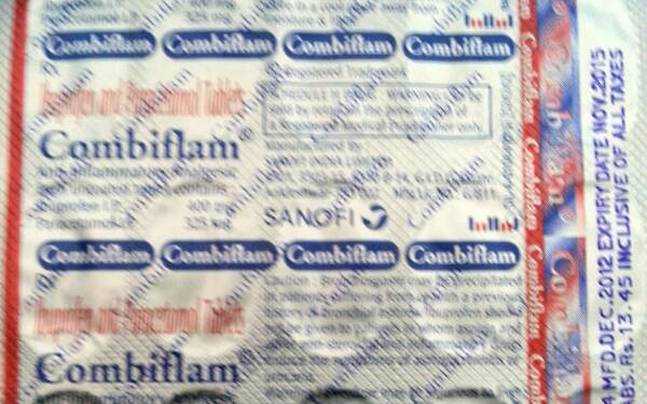

In [27]:
a1 = image.load('a.jpg',3,'byte')
a=image.scale(a1,20,20):float()
itorch.image(a1)

In [28]:
pred = model:forward(a)
confidences, indices = torch.sort(pred, true)  

In [32]:
print(indices[1])

1	
